In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d_data = pd.read_csv("deliveries.csv")
m_data = pd.read_csv("matches.csv")

In [3]:
d_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
m_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
m_data['team1'].value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [6]:
def name_changer(data):
    if data=="Delhi Daredevils":
        data = "Delhi Capital"
    elif data=="Deccan Chargers":
        data = "Sunrisers Hyderabad"
    elif data=="Pune Warriors" or data=="Rising Pune Supergiant":
        data = "Rising Pune Supergiants"
    return data
    

In [7]:
m_data['team2']=m_data['team2'].apply(lambda x:name_changer(x))
m_data['team1']=m_data['team1'].apply(lambda x:name_changer(x))
m_data['toss_winner']=m_data['toss_winner'].apply(lambda x:name_changer(x))
m_data['winner']=m_data['winner'].apply(lambda x:name_changer(x))

In [8]:
m_data.sample(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
72,73,2008,Chandigarh,2008-04-27,Delhi Capital,Kings XI Punjab,Delhi Capital,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker,NaN
449,450,2013,Dharamsala,2013-05-18,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,50,0,Azhar Mahmood,Himachal Pradesh Cricket Association Stadium,HDPK Dharmasena,CK Nandan,NaN


In [9]:
m_data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capital', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [6]:
m_data.replace(["Sunrisers Hyderabad","Mumbai Indians","Gujarat Lions","Royal Challengers Bangalore",
               "Kolkata Knight Riders","Kings XI Punjab","Chennai Super Kings","Rajasthan Royals",
               "Kochi Tuskers Kerala","Rising Pune Supergiants","Delhi Capital"],
              ['SRH','MI','GL','RCB','KKR','KXIP','CSK','RR','KTK','RPS','DC'],inplace=True)

In [8]:
d_data.replace(["Sunrisers Hyderabad","Mumbai Indians","Gujarat Lions","Royal Challengers Bangalore",
               "Kolkata Knight Riders","Kings XI Punjab","Chennai Super Kings","Rajasthan Royals",
               "Kochi Tuskers Kerala","Rising Pune Supergiants","Delhi Capital"],
              ['SRH','MI','GL','RCB','KKR','KXIP','CSK','RR','KTK','RPS','DC'],inplace=True)

In [9]:
m_data.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
231,232,2010,Mumbai,2010-04-22,CSK,Deccan Chargers,CSK,bat,normal,0,CSK,38,0,DE Bollinger,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN
363,364,2012,Chennai,2012-05-12,Delhi Daredevils,CSK,CSK,field,normal,0,CSK,0,9,BW Hilfenhaus,"MA Chidambaram Stadium, Chepauk",S Das,BR Doctrove,NaN
606,607,2016,Rajkot,2016-05-03,GL,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,RR Pant,Saurashtra Cricket Association Stadium,CB Gaffaney,BNJ Oxenford,NaN
629,630,2016,Kanpur,2016-05-21,MI,GL,GL,field,normal,0,GL,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
276,277,2011,Mumbai,2011-05-04,MI,Pune Warriors,Pune Warriors,field,normal,0,MI,21,0,R Sharma,Dr DY Patil Sports Academy,HDPK Dharmasena,SJA Taufel,NaN


In [10]:
d_data.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
86490,366,2,KXIP,Deccan Chargers,4,2,SE Marsh,Mandeep Singh,AA Jhunjhunwala,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
96271,406,2,CSK,KKR,20,1,RA Jadeja,DJ Bravo,YK Pathan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89793,380,1,CSK,Delhi Daredevils,6,6,M Vijay,MEK Hussey,VR Aaron,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
109721,463,1,KKR,Delhi Daredevils,18,6,Shakib Al Hasan,YK Pathan,NM Coulter-Nile,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
69026,292,2,MI,Deccan Chargers,5,5,RG Sharma,SR Tendulkar,PP Ojha,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [11]:
m_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [12]:
m_data = m_data.drop(columns=["umpire1",'umpire2','umpire3'],axis=1)
m_data["city"].fillna("Not Known",inplace=True)
m_data["winner"].fillna("Not Known",inplace=True)
m_data["player_of_match"].fillna("Not Known",inplace=True)

In [13]:
m_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [14]:
m_data.sample()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
523,524,2015,Mumbai,2015-04-12,KXIP,MI,MI,field,normal,0,KXIP,18,0,GJ Bailey,Wankhede Stadium


In [15]:
m_data["winner"].value_counts()

MI                        92
CSK                       79
KKR                       77
RCB                       73
KXIP                      70
RR                        63
Delhi Daredevils          62
SRH                       42
Deccan Chargers           29
GL                        13
Pune Warriors             12
Rising Pune Supergiant    10
KTK                        6
RPS                        5
Not Known                  3
Name: winner, dtype: int64

In [16]:
m_data.shape

(636, 15)

In [17]:
m_data.team1.unique()

array(['SRH', 'MI', 'GL', 'Rising Pune Supergiant', 'RCB', 'KKR',
       'Delhi Daredevils', 'KXIP', 'CSK', 'RR', 'Deccan Chargers', 'KTK',
       'Pune Warriors', 'RPS'], dtype=object)

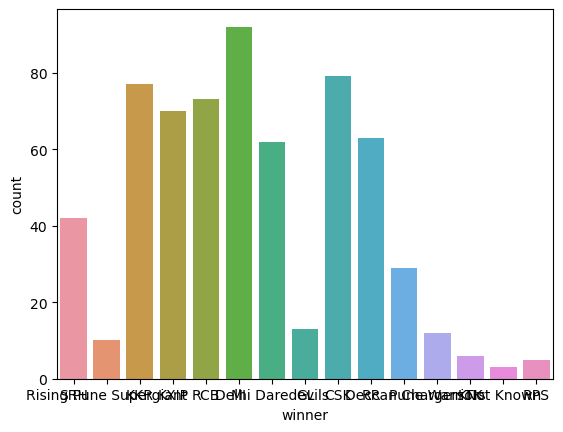

In [18]:
sns.countplot(x=m_data["winner"])
plt.xticks = 7

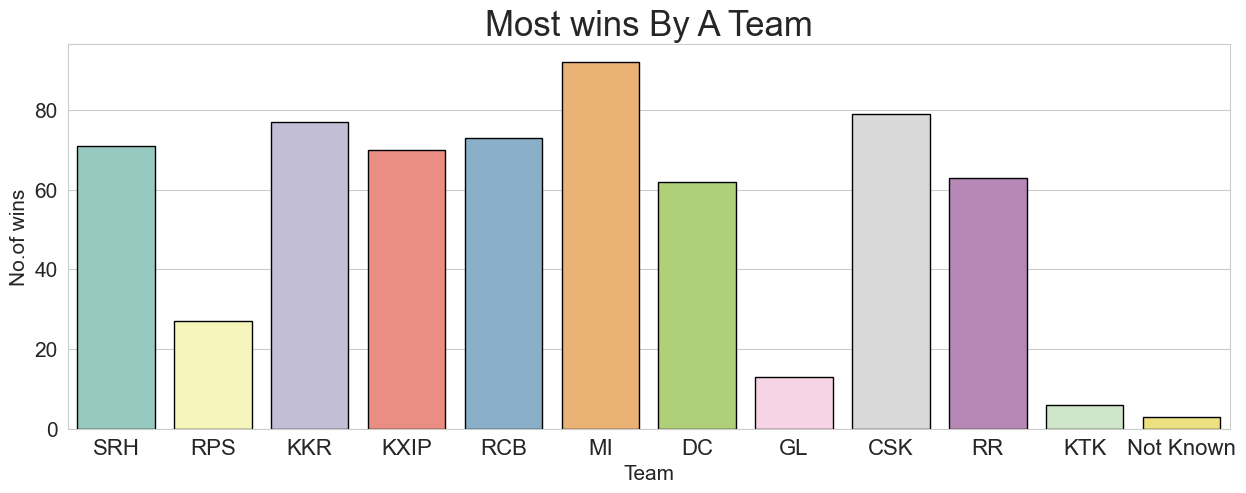

In [21]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.countplot(x=m_data['winner'],palette="Set3",edgecolor="black")
plt.title("Most wins By A Team",size=25)
plt.xlabel("Team",size=15)
plt.ylabel("No.of wins",size=15)
plt.yticks(size =15)
plt.xticks(size=16)
plt.show()

In [22]:
most_mom=m_data["player_of_match"].value_counts().head(10)
most_mom

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

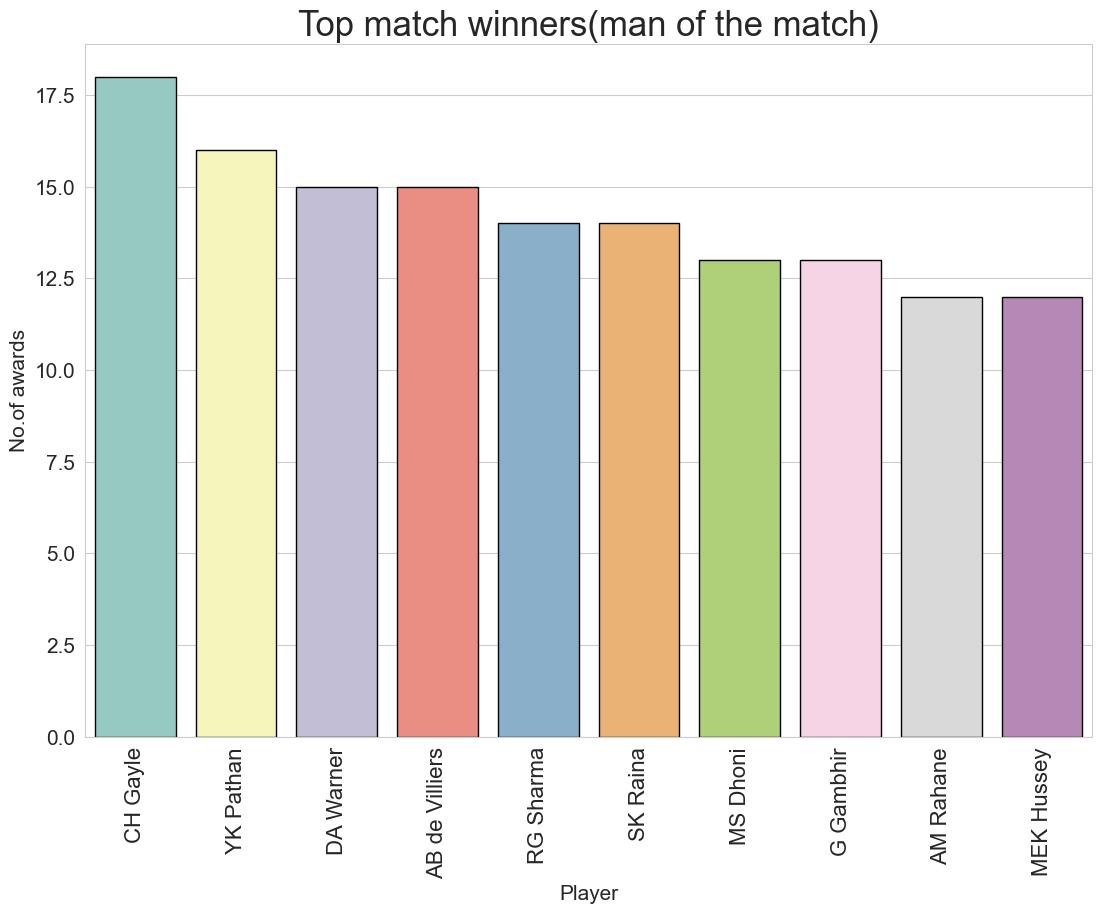

In [83]:
most_mom=m_data["player_of_match"].value_counts().head(10).reset_index()
most_mom.columns = ["Player",'No.of Awards']
plt.figure(figsize=(13,9))
sns.set_style("whitegrid")
sns.barplot(x=most_mom['Player'],y=most_mom["No.of Awards"],palette="Set3",edgecolor="black")
plt.title("Top match winners(man of the match)",size=25)
plt.xlabel("Player",size=15)
plt.ylabel("No.of awards",size=15)
plt.yticks(size =15)
plt.xticks(size=16)
plt.xticks(rotation="vertical")
plt.show()

In [26]:
d_data.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
44198,188,1,MI,RCB,18,5,R Sathish,Harbhajan Singh,DW Steyn,0,...,0,0,0,0,0,0,0,R Sathish,caught,R Dravid
79435,337,1,Deccan Chargers,KKR,17,3,IR Jaggi,JP Duminy,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
48746,207,1,MI,Deccan Chargers,1,2,S Dhawan,SR Tendulkar,RG Sharma,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
10951,47,1,MI,SRH,14,4,RG Sharma,HH Pandya,MC Henriques,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
98364,415,2,KKR,KXIP,7,3,MS Bisla,JH Kallis,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [34]:
d_data.batsman_runs.value_counts()

0    61148
1    55497
4    17033
2     9705
6     6523
3      509
5       45
Name: batsman_runs, dtype: int64

In [38]:
best_batsman  = d_data.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


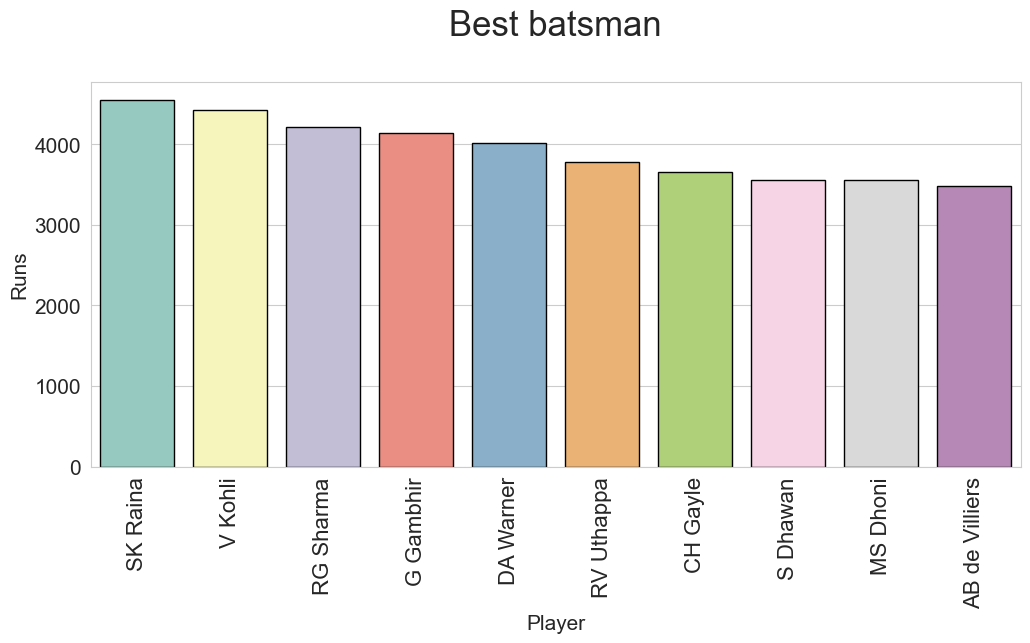

In [39]:
best_batsman = best_batsman.set_index('batsman').sort_values(by = ["batsman_runs"],ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=best_batsman.index ,y=best_batsman["batsman_runs"],palette="Set3",edgecolor="black")
plt.title("Best batsman\n",size=25)
plt.xlabel("Player",size=15)
plt.ylabel("Runs",size=15)
plt.yticks(size =15)
plt.xticks(size=16)
plt.xticks(rotation="vertical")
plt.show()

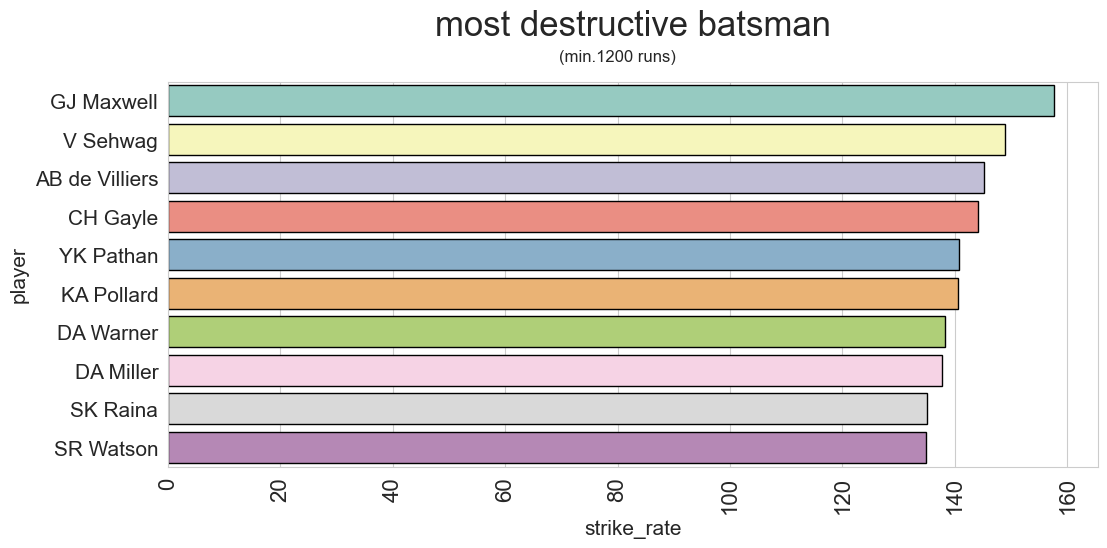

In [53]:
strike_rate = d_data.groupby(["batsman"]).batsman_runs.sum().reset_index()
strike_rate["balls"] = d_data.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate']=strike_rate["batsman_runs"]/strike_rate["balls"]*100
strike_rate = strike_rate[strike_rate["batsman_runs"]>=1200].sort_values(by=["rate"],ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=strike_rate['rate'],y=strike_rate["batsman"],palette="Set3",edgecolor="black")
plt.title("most destructive batsman\n",size=25)
plt.suptitle("\n(min.1200 runs)")
plt.xlabel("strike_rate",size=15)
plt.ylabel("player",size=15)
plt.yticks(size =15)
plt.xticks(size=16)
plt.xticks(rotation="vertical")
plt.show()

In [54]:
d_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [55]:
d_data.sample(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14440,62,1,RR,Delhi Daredevils,18,2,SK Trivedi,D Salunkhe,MF Maharoof,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
58918,249,1,Deccan Chargers,KXIP,20,6,DB Ravi Teja,DW Steyn,RJ Harris,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
80090,340,1,KXIP,MI,8,3,SE Marsh,N Saini,CJ McKay,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
70270,298,1,Pune Warriors,KKR,2,4,MK Pandey,CJ Ferguson,YK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
67474,285,2,RR,CSK,7,2,LRPL Taylor,AM Rahane,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18145,78,1,RR,KKR,4,4,M Kaif,SA Asnodkar,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
89542,379,1,CSK,MI,6,3,MEK Hussey,S Badrinath,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
39078,167,1,Delhi Daredevils,RCB,10,4,AB de Villiers,KD Karthik,A Kumble,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14897,64,1,Deccan Chargers,KKR,16,4,A Symonds,SB Bangar,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
7894,34,1,GL,MI,9,2,KD Karthik,Ishan Kishan,KH Pandya,0,...,0,0,0,0,0,1,1,KD Karthik,stumped,PA Patel


C:\Users\Admin\AppData\Local\Temp\ipykernel_2672\2083428654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  economy_rate=d_data.groupby(['bowler']).sum()


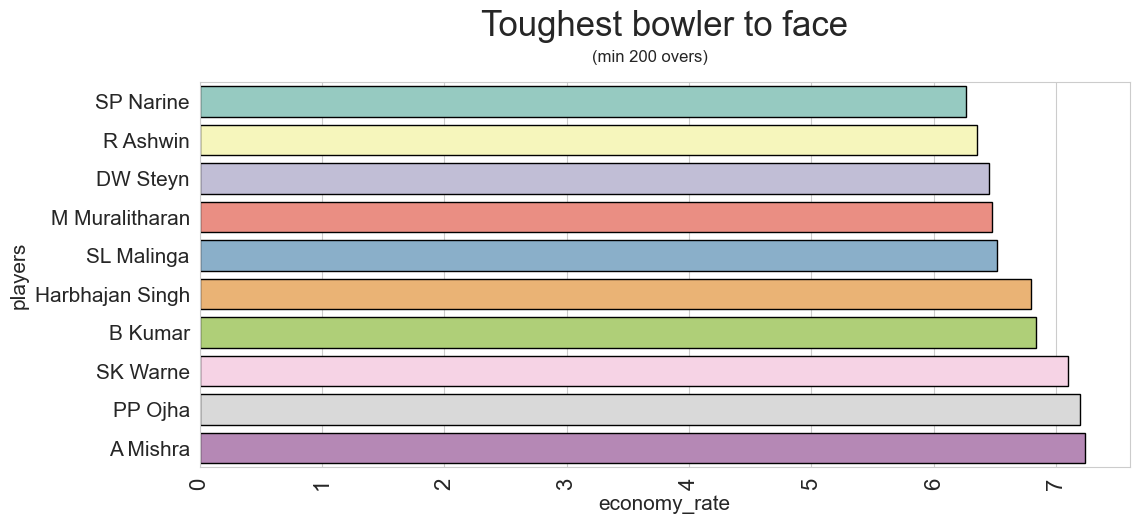

In [62]:
economy_rate=d_data.groupby(['bowler']).sum()
economy_rate["over"] = d_data['bowler'].value_counts()/6
economy_rate["runs"] = economy_rate['wide_runs']+economy_rate["noball_runs"]+economy_rate["batsman_runs"]
economy_rate=economy_rate[economy_rate['over']>=200]
economy_rate["rate"]=economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'],ascending=True).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=economy_rate['rate'],y=economy_rate.index, palette="Set3",edgecolor="black")
plt.title("Toughest bowler to face\n",size=25)
plt.suptitle("\n(min 200 overs)")
plt.xlabel("economy_rate",size=15)
plt.ylabel("players",size=15)
plt.yticks(size =15)
plt.xticks(size=16)
plt.xticks(rotation="vertical")
plt.show()

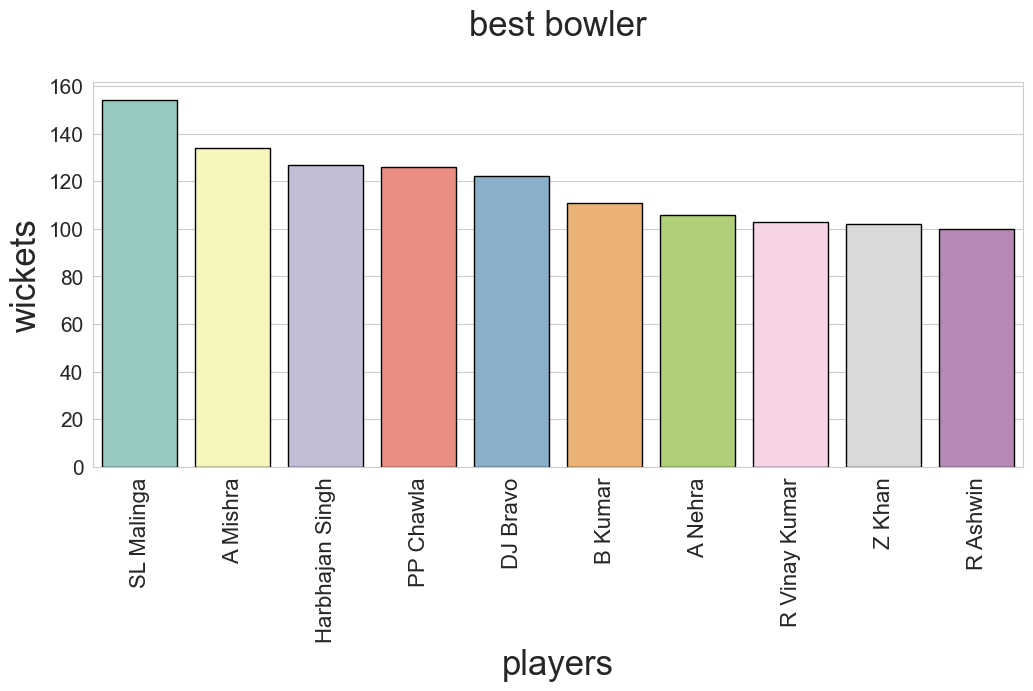

In [29]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = d_data.loc[d_data['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler','wickets']
plt.figure(figsize=(12,5))
sns.barplot(x=best_bowler['bowler'],y=best_bowler["wickets"], palette="Set3",edgecolor="black")
plt.title("best bowler\n",size=25)
plt.ylabel("wickets",size=25)
plt.xlabel("players",size=25)
plt.yticks(size =15)
plt.xticks(size=16)
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2672\215912501.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  venue = venue.pivot("venue",'winner')


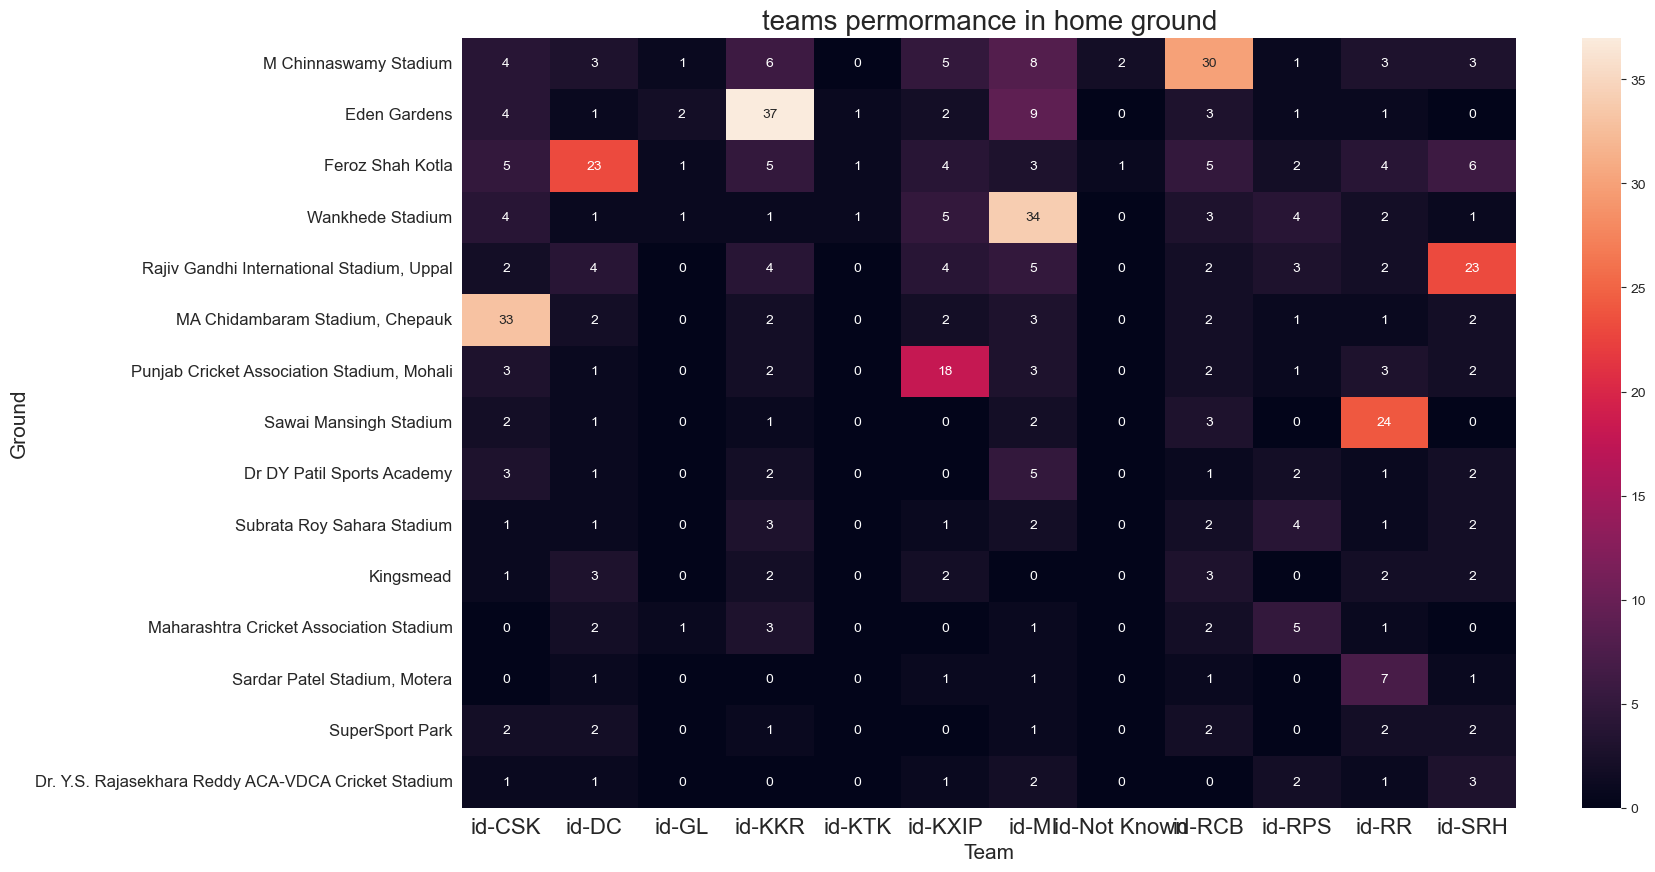

In [64]:
venue = m_data.groupby(["venue",'winner']).count()
venue = venue.iloc[:,:1].reset_index()
venue = venue.pivot("venue",'winner')
venue.fillna(0,inplace=True)
venue['total']=venue.sum(axis=1,skipna=False)
venue['total']
venue = venue.sort_values(by=['total'],ascending=False).head(15)
venue.drop(['total'],axis=1,inplace=True)
sns.set_style("dark")
plt.figure(figsize=(17,10))
sns.heatmap(data=venue,annot=True,cmap="rocket")
plt.ylabel("Ground",size=15)
plt.xlabel("Team",size=15)
plt.yticks(size =12)
plt.xticks(size=16)
plt.title("teams permormance in home ground",size=20)
plt.show()